Análise de Gráficos

1. 

Gráfico 1 - "Distribuição de Funcionários por Setor"
Neste gráfico ocorre um erro de semântica pois é esperado um gráfico de quantidade 
de funcionários por setor, porém pelo contrário o gráfico mostra a frequência,
fala uma coisa e mostra outra. 
____________________________________________________________________________________
Gráfico 2 - "Evolução de Salários por Setor"
Neste gráfico ocorre um erro de semântica pois ele diz evolução de 
salários por setor,porém mostra a média de salários em cada setor,não mostrando 
evolução nenhuma,se fosse "Média de Salários por Setor", faria mais sentido.
____________________________________________________________________________________
Gráfico 3 - "Comparação de Idade e Salário"
Neste gráfico ocorre um erro de técnica, pois as idades além de não estarem em
ordem crescente está toda bagunçada mal da pra ver, faria mais sentido se 
as idades estivessem separadas por faixas etárias, como por exemplo:
18 - 24.
____________________________________________________________________________________
Gráfico 4 - "Relação entre Setor e Satisfação"
Neste gráfico ocorre um erro de técnica, pois o jeito que ele decidiu demonstrar 
o eixo de satisfação ficou meio estranho, ficaria melhor uma média das satisfações
mostradas em um gráfico de barras talvez.
____________________________________________________________________________________
Gráfico 5 - "Variação Salarial na Empresa"
Este gráfico está correto, bem disposto, usando "Candle" para suprimir os outliers
demonstra bem o que é descrito, dando a entender bem e que a média de salários
da empresa está em torno de pouco menos de 10000.
____________________________________________________________________________________

2.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("dataset_prova.csv")
df.head()

,Setor,Idade,Experiência (anos),Salário (R$),Horas de Trabalho/Semana,Satisfação (1-5)
0,RH,39,18,9225.487461,38.423171,4
1,Financeiro,47,29,11436.227507,30.729479,5
2,Vendas,55,37,7363.555229,49.364169,4
3,RH,31,11,14661.384993,35.313320,2
4,RH,57,36,14549.367539,58.213758,2


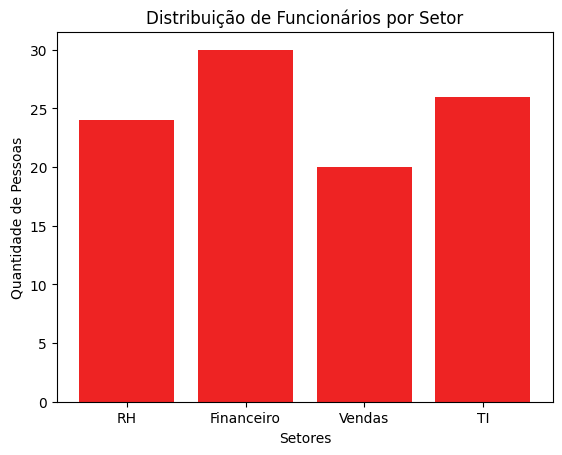

In [6]:
# GRÁFICO 1
setores = ["RH", "Financeiro", "Vendas", "TI"]
qtd_setores = []

for setor in setores:
    qtd_setores.append(len(df[df["Setor"] == setor]))


plt.title("Distribuição de Funcionários por Setor")
plt.ylabel("Quantidade de Pessoas")
plt.xlabel("Setores")
plt.bar(setores,qtd_setores, color="#EE2323")
plt.show()

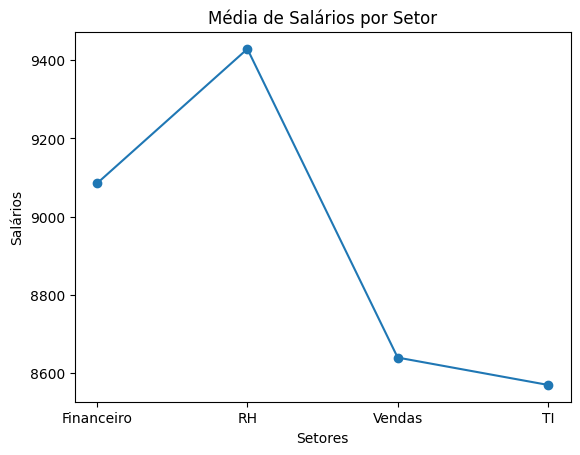

In [45]:
# GRÁFICO 2
setores = ["Financeiro","RH", "Vendas", "TI"]
media_salarios = []

for setor in setores:
    setor = df[df["Setor"] == setor]
    media_salarios.append(int(setor["Salário (R$)"].mean()))

plt.plot(setores, media_salarios, marker="o")
plt.xlabel("Setores")
plt.ylabel("Salários")
plt.title("Média de Salários por Setor")

plt.show()

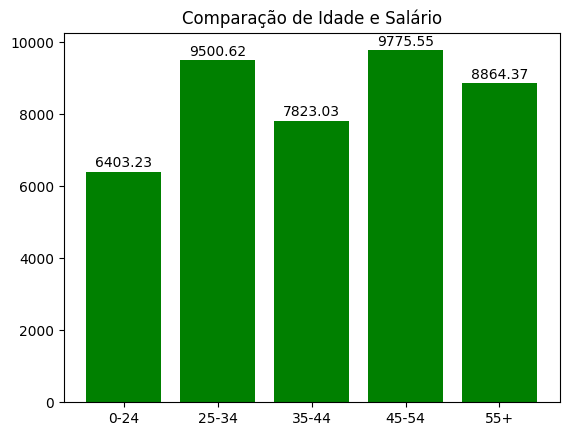

In [6]:
#GRÁFICO 3
bins = [0, 24, 34, 44, 54, float("inf")]
labels = ["0-24", "25-34", "35-44","45-54", "55+"]
df["Faixa Etária"] = pd.cut(df["Idade"], bins=bins, labels=labels, right=False)
media_salarial = df.groupby("Faixa Etária", observed=True)["Salário (R$)"].mean().round(2).tolist()

plt.title("Comparação de Idade e Salário")
bars = plt.bar(labels, media_salarial, color="green")
plt.bar_label(bars, fmt="%.2f", padding=1)
plt.show()


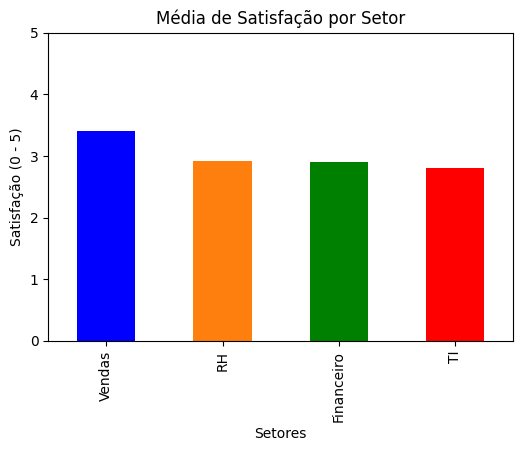

In [28]:
# GRÁFICO 4
media_setores = df.groupby("Setor")["Satisfação (1-5)"].mean().sort_values(ascending=False)
cores = ["blue", "#ff7f0e", "green", "red"]

media_setores.plot(kind="bar", color=cores, figsize=(6, 4))
plt.title("Média de Satisfação por Setor")
plt.ylabel("Satisfação (0 - 5)")
plt.ylim(0, 5)
plt.xlabel("Setores")
plt.show()

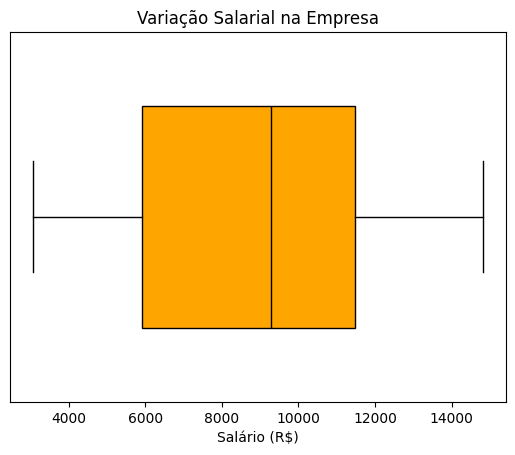

In [5]:
#GRÁFICO 5
salarios = df["Salário (R$)"]

plt.title("Variação Salarial na Empresa")
plt.xlabel("Salário (R$)")
plt.boxplot(salarios, 
            vert=False, 
            patch_artist=True, 
            widths=0.6,
            boxprops={"facecolor": "orange"},
            medianprops={"color": "black"})
plt.yticks([])
plt.show()

Análise Estatística

#Análise do codigo_chaotic_evil.py

O jeito que foi calculado o índice de desempenho foi errado e não faz sentido, pois quando você divide o desempenho pela idade, pessoas mais velhas ficariam com um desempenho pior, o que não necessariamente é verdade, inclusive a tendência é ser o contrário. Faria mais sentido o calculo de desempenho se fosse pela remuneração por horas trabalhadas, o que geralmente tende a ser mais verdadeiro.

Desvio padrão calculado errado, usar o .abs() não faz sentido para calcular um desvio padrão, que por sua vez necessita da raiz quadrada. O certo seria usar o .std().

Concluindo, o código por si próprio não tem erros de sintaxe, mas tem muitos erros de lógica, o que no final o torna inutilizavel para a análise dos parâmetros analisados nele.

Código refatorado ->

In [15]:
df["Salário por Hora"] = df["Salário (R$)"] / df["Horas de Trabalho/Semana"]

produtividade_media = df["Salário por Hora"].mean()
desvio_padrao = df["Salário (R$)"].std()
amplitude = df["Salário (R$)"].max() - df["Salário (R$)"].min()
correlacao = df["Satisfação (1-5)"].corr(df["Horas de Trabalho/Semana"])
satisfacao_media = df["Satisfação (1-5)"].mean()

print("--- Análise Melhorada ---")
print(f"\n1. Salário Médio por Hora (Produtividade boa,\njá que mais produtivos tendem a ganhar mais): R$ {produtividade_media:.2f}")
print(f"2. Desvio Padrão: R$ {desvio_padrao:.2f}")
print(f"3. Correlação Satisfação e Horas de trabalho: {correlacao:.2f}")

--- Análise Melhorada ---

1. Salário Médio por Hora (Produtividade boa,
já que mais produtivos tendem a ganhar mais): R$ 211.02
2. Desvio Padrão: R$ 3408.97
3. Correlação Satisfação e Horas de trabalho: 0.03
